In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('train_news.csv')
data

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...,...
20795,20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [3]:
df=pd.DataFrame(data)
df.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [4]:
# Checking all  unique values and their counts & null values
for i in df.columns:
    print('\n')
    print(i)
    print(df[i].unique())
    print('The Total no. of unique value:',len(df[i].unique()))
    print(df[i].value_counts())
    print('Null values:',df[i].isnull().sum())



Unnamed: 0
[    0     1     2 ... 20797 20798 20799]
The Total no. of unique value: 20800
2047     1
677      1
4743     1
19084    1
17037    1
        ..
9550     1
11599    1
17746    1
19795    1
0        1
Name: Unnamed: 0, Length: 20800, dtype: int64
Null values: 0


id
[ 9653 10041 19113 ... 18142 12139 15660]
The Total no. of unique value: 20800
2047     1
677      1
4743     1
19084    1
17037    1
        ..
9550     1
11599    1
17746    1
19795    1
0        1
Name: id, Length: 20800, dtype: int64
Null values: 0


headline
['Ethics Questions Dogged Agriculture Nominee as Georgia Governor - The New York Times'
 'U.S. Must Dig Deep to Stop Argentina’s Lionel Messi - The New York Times'
 'Cotton to House: ’Do Not Walk the Plank and Vote for a Bill that Cannot Pass the Senate’ - Breitbart'
 ...
 'Dakota Access Caught Infiltrating Protests to Incite Violence, Funding Trolls Online'
 'How to Stretch the Summer Solstice - The New York Times'
 'Emory University to Pay for ’100 Pe

In [5]:
df.drop({'Unnamed: 0','id'}, axis=1, inplace=True)
df.head()

,headline,written_by,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [6]:
df.dtypes

headline      object
written_by    object
news          object
label          int64
dtype: object

In [7]:
#Checking all duplicated rows
df.duplicated().sum()

109

In [8]:
#Dropping dulpicate rows
df=df.drop_duplicates()

In [9]:
df.shape

(20691, 4)

In [10]:
#Checking null values
df.isnull().sum()

headline       518
written_by    1932
news            39
label            0
dtype: int64

In [11]:
#dropping nan value in column 'news'.
df=df.dropna(subset=['news'])

In [12]:
df.shape

(20652, 4)

In [13]:
df.head()

,headline,written_by,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [14]:
#Replacing Nan values with 'No_data'
df=df.fillna({'written_by':'No_data'})

In [15]:
df['length'] = df.news.str.len()
df.head(5)

,headline,written_by,news,label,length
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,7936
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,6112
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,425
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,6516
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,9164


In [16]:
# Convert all news to lower case
df['news'] = df['news'].str.lower()

In [17]:
# Remove punctuation
df['news'] = df['news'].str.replace(r'[^\w\d\s]', ' ')

In [18]:
# Replace whitespace between terms with a single space
df['news'] = df['news'].str.replace(r'\s+', ' ')

In [19]:
#Remove leading and trailing whitespace
df['news'] = df['news'].str.replace(r'^\s+|\s+?$', '')

In [20]:
# Remove stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

df['news'] = df['news'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [21]:
from nltk.stem import WordNetLemmatizer

In [22]:
#Lemmatization
lem=WordNetLemmatizer()
df['news'] = df['news'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [23]:
# New column (clean_length) after puncuations,stopwords removal
df['clean_length'] = df.news.str.len()
df.head()

,headline,written_by,news,label,length,clean_length
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,washington sonny perdue telling georgian growi...,0,7936,5351
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,houston venezuela plan tactical approach desig...,0,6112,4046
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,sunday abc week discussing republican plan rep...,0,425,266
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,augusta beleaguered republican governor maine ...,0,6516,4341
4,A Digital 9/11 If Trump Wins,Finian Cunningham,finian cunningham written extensively internat...,1,9164,6569


In [24]:
# Total length removal
print ('length', df.length.sum())
print ('clean_length', df.clean_length.sum())

length 94070378
clean_length 63553983


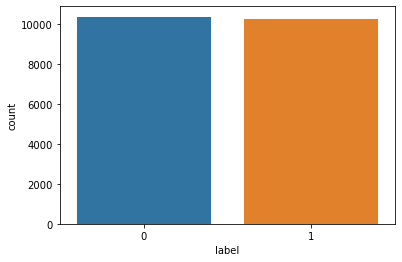

In [25]:
sns.countplot(x='label',data=df)
plt.show()

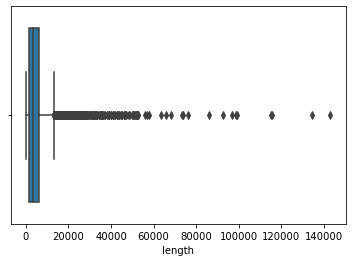

In [26]:
sns.boxplot(x='length',data=df)
plt.show()

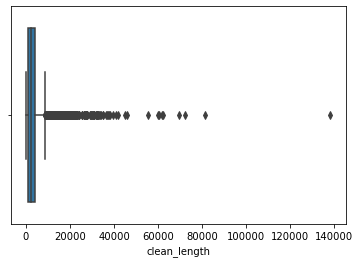

In [27]:
sns.boxplot(x='clean_length',data=df)
plt.show()

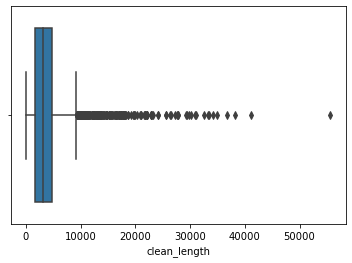

In [28]:
sns.boxplot(df['clean_length'][df['label']==0])
plt.show()

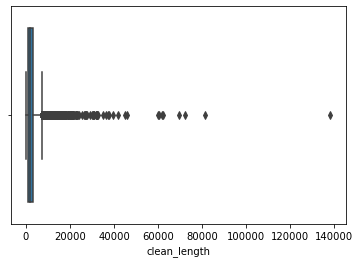

In [29]:
sns.boxplot(df['clean_length'][df['label']==1])
plt.show()

In [30]:
#Creating a list of writers who have only published fake news.
Fake_writer=[]

In [31]:
#Writers who have pulished fake news
fake=df['written_by'][df['label']==1].unique()

In [32]:
#Writer who have published genuine news
not_fake=df['written_by'][df['label']==0].unique()

In [33]:
#Writer who have published only fake news
for i in fake:
    if i not in not_fake:
      Fake_writer.append(i)  

In [34]:
Fake_writer

['Finian Cunningham',
 'Brian Sonenstein',
 'steventexas',
 'Gillian',
 'V Saxena',
 'Iron Sheik',
 'Luke Stranahan',
 'hubwolf',
 'Daniel Greenfield',
 'Madeline',
 'Maria Dubovikova',
 'OZbanislam',
 'OpenThePodBayDoorsHAL',
 'Jason Ditz',
 'OK',
 'UnReal Mama',
 'King World News',
 'Eric Zuesse.',
 'Carl Herman',
 'voltairenet.org',
 'Tomás Fuentes',
 'Adam Dick',
 'Chris Zinda',
 'Anteater',
 'newsguy76',
 'BareNakedIslam',
 'The Daily Sheeple',
 'Michael Ware',
 '-NO AUTHOR-',
 'Edmondo Burr',
 'Tom Cahill',
 'Paul Reinhardt',
 'morris',
 'Doug P.',
 'EdJenner',
 'Aaron Kesel',
 'Jay Syrmopoulos',
 'Consortiumnews.com',
 'Colin Taylor',
 'Ian Greenhalgh',
 'Grant Stern',
 'Poke Staff',
 'Lee Adler',
 'Vicki Batts',
 'Blanche Benson',
 'Mac Slavo',
 'stevew',
 'Ryan Banister',
 'Julius Hubris',
 'Glen Ford',
 'Amanda Froelich',
 'Bryan K. Bullock',
 'Mail Man (UID 50906934)',
 'Alex Ansary',
 'Starkman',
 'NewsBiscuit',
 'Debbie Menon',
 'Ron Paul',
 'David Stockman',
 'noreply@blo

In [35]:
len(Fake_writer)

1976

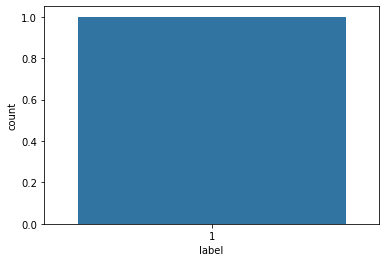

In [36]:
# we can cross check by taking one writer from the list
sns.countplot(df[df['written_by']=='hubwolf']['label'])
plt.show()

In [37]:
from wordcloud import WordCloud

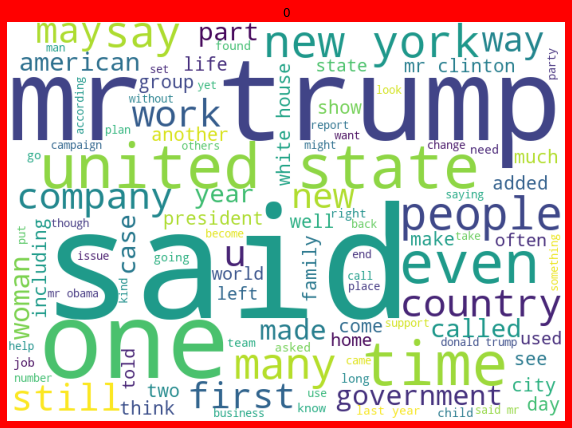

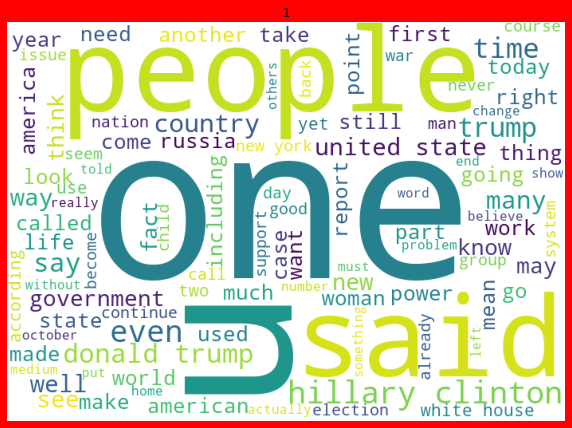

In [38]:
for i in [0,1]:
    rev = df['news'][df['label']==i]

    rev_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(rev))

    plt.figure(figsize=(10,8),facecolor='r')
    plt.imshow(rev_cloud)
    plt.axis('off')
    plt.title(i)
    plt.show()

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
tf_vec = TfidfVectorizer(max_features=1000)
features = tf_vec.fit_transform(df.news).toarray()
x = features
y = df['label']

## MODEL SELECTION

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, log_loss, confusion_matrix

In [42]:
# Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [43]:
model=[ MultinomialNB(),GaussianNB(),LogisticRegression(),SVC(),DecisionTreeClassifier()]
for i in model:
    print(i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('Accuracy score :', accuracy_score(y_test,pred))
    print('Confusion matrix :\n', confusion_matrix(y_test,pred))
    print('Classification report: \n ', classification_report(y_test,pred))
    print('Log loss:',log_loss(y_test,pred))
    print('*************************************************')
    print('\n')

MultinomialNB()
Accuracy score : 0.8784699806326662
Confusion matrix :
 [[2824  255]
 [ 498 2619]]
Classification report: 
                precision    recall  f1-score   support

           0       0.85      0.92      0.88      3079
           1       0.91      0.84      0.87      3117

    accuracy                           0.88      6196
   macro avg       0.88      0.88      0.88      6196
weighted avg       0.88      0.88      0.88      6196

Log loss: 4.197531072096909
*************************************************


GaussianNB()
Accuracy score : 0.8444157520981278
Confusion matrix :
 [[2641  438]
 [ 526 2591]]
Classification report: 
                precision    recall  f1-score   support

           0       0.83      0.86      0.85      3079
           1       0.86      0.83      0.84      3117

    accuracy                           0.84      6196
   macro avg       0.84      0.84      0.84      6196
weighted avg       0.84      0.84      0.84      6196

Log loss: 5.3737460

## CROSS VALIDATION

In [44]:
for i in model:
    cross=cross_val_score(i,x,y,cv=5)
    print(i)
    print('Score:',cross)
    print('Mean_score:',cross.mean())
    print('STD_score:',cross.std())
    print('****************************')

MultinomialNB()
Score: [0.87678528 0.85645122 0.87094431 0.87288136 0.87360775]
Mean_score: 0.8701339837043836
STD_score: 0.007095483729290718
****************************
GaussianNB()
Score: [0.84870491 0.82425563 0.83849879 0.84116223 0.83510896]
Mean_score: 0.8375461036057026
STD_score: 0.008013481459039995
****************************
LogisticRegression()
Score: [0.93464052 0.92737836 0.93825666 0.9377724  0.931477  ]
Mean_score: 0.933904986979098
STD_score: 0.004072515892449388
****************************
SVC()
Score: [0.94747035 0.94504962 0.94697337 0.94794189 0.94697337]
Mean_score: 0.9468817181612129
STD_score: 0.0009842569751846635
****************************
DecisionTreeClassifier()
Score: [0.87460663 0.8644396  0.8716707  0.87457627 0.86658596]
Mean_score: 0.8703758331120689
STD_score: 0.004167061914824492
****************************


## ENSEMBLE TECHNIQUE

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred2=rf.predict(x_test)
print('Accuracy score :', accuracy_score(y_test,pred))
print('Confusion matrix :\n', confusion_matrix(y_test,pred))
print('Classification report: \n ', classification_report(y_test,pred))
print('Log loss:',log_loss(y_test,pred))

Accuracy score : 0.8771788250484184
Confusion matrix :
 [[2717  362]
 [ 399 2718]]
Classification report: 
                precision    recall  f1-score   support

           0       0.87      0.88      0.88      3079
           1       0.88      0.87      0.88      3117

    accuracy                           0.88      6196
   macro avg       0.88      0.88      0.88      6196
weighted avg       0.88      0.88      0.88      6196

Log loss: 4.242139814524979


In [46]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
pred2=abc.predict(x_test)
print('Accuracy score :', accuracy_score(y_test,pred))
print('Confusion matrix :\n', confusion_matrix(y_test,pred))
print('Classification report: \n ', classification_report(y_test,pred))
print('Log loss:',log_loss(y_test,pred))

Accuracy score : 0.8771788250484184
Confusion matrix :
 [[2717  362]
 [ 399 2718]]
Classification report: 
                precision    recall  f1-score   support

           0       0.87      0.88      0.88      3079
           1       0.88      0.87      0.88      3117

    accuracy                           0.88      6196
   macro avg       0.88      0.88      0.88      6196
weighted avg       0.88      0.88      0.88      6196

Log loss: 4.242139814524979


## HYPER PARAMETER TUNNING

In [47]:
from sklearn.model_selection import GridSearchCV
parameters = [{'kernel':('linear', 'poly', 'rbf'),'C':[1,10]}]

In [48]:
Grid=GridSearchCV(estimator=SVC(),param_grid=parameters)
Grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10], 'kernel': ('linear', 'poly', 'rbf')}])

In [49]:
Grid.best_params_

{'C': 10, 'kernel': 'rbf'}

In [51]:
svc2=SVC(C=10)
svc2.fit(x_train,y_train)
pred=svc2.predict(x_test)
print('Accuracy score :', accuracy_score(y_test,pred))
print('Confusion matrix :\n', confusion_matrix(y_test,pred))
print('Classification report: \n ', classification_report(y_test,pred))
print('Log loss:',log_loss(y_test,pred))

Accuracy score : 0.9570690768237573
Confusion matrix :
 [[2944  135]
 [ 131 2986]]
Classification report: 
                precision    recall  f1-score   support

           0       0.96      0.96      0.96      3079
           1       0.96      0.96      0.96      3117

    accuracy                           0.96      6196
   macro avg       0.96      0.96      0.96      6196
weighted avg       0.96      0.96      0.96      6196

Log loss: 1.4827989778404331


In [52]:
import joblib

In [53]:
joblib.dump(svc2,'Fake_news.pkl')

['Fake_news.pkl']